# Ejercicios Tema 3 - Interpolación

`ejercicios pendientes relativamente interesantes`
- ej 3
- ej 7

### Ejercicio 0

Implementa/escribe el pseudocódigo del algoritmo X de interpolación/ajuste/integración

### Ejercicio 1

Dados los puntos:

<center>

| $x$ | $y$ |
|-----|-----|
| 0 | 7 |
| 2 | 11 |
| 3 | 28 |

</center>

utiliza el método de Lagrange para determinar el valor de $y$ en $x=1$. Realiza los cálculos sin usar ordenador.

In [1]:
def coeficientes_p_newton(x_data: list | tuple,
                          y_data: list | tuple) -> list:

    x_iniciales = x_data
    y_iniciales = y_data
    capa_actual = 0
    coeficientes = []
    dif_divididas = []
    coeficientes.append(y_iniciales[0])
    
    while len(y_iniciales) > 1:
        #i = 0
        for i in range(len(y_iniciales) - 1):

            valor = (y_iniciales[i+1] - y_iniciales[i]) / (x_iniciales[i+capa_actual+1] - x_iniciales[i])

            dif_divididas.append(valor)

            if i == 0:
                coeficientes.append(valor)

            i += 1
        
        capa_actual += 1
        y_iniciales = dif_divididas
        dif_divididas = []
    
    return coeficientes

x = [-2, 1, 4, -1, 3, -4]
y = [-1, 2, 59, 4, 24, -53]

print(coeficientes_p_newton(x, y))

[-1, 1.0, 3.0, 1.0, 0.0, 0.0]


### Ejercicio 2

Programa una función ```eval_newton_poly(y_data: list, x_data: list, x: float) -> float``` que devuelva el valor en ```x``` que toma el polinomio interpolante, donde ```y_data``` y ```x_data``` son respectivamente los valores $y / x$ sobre los que se construye el polinomio. Internamente, dicha función debe usar otra función ```coeffts(y_data: list, x_data: list) -> float``` (que también deberá ser programada). Esta última función simplemente evaluará los coeficientes del polinomio por el método de las diferencias divididas (Newton) y los devolverá como una lista.

In [2]:
def evaluate_newton_polynomial(coefficients: list,
                               x_data: list,
                               x: float):
    p_n = coefficients[0]
    producto_acumulado = 1
    for i in range(1, len(coefficients)):
        producto_acumulado *= (x - x_data[i - 1])
    
        valor = coefficients[i] * producto_acumulado
        p_n +=  valor
    return p_n

x = [-2, 1, 4, -1, 3, -4]
y = [-1, 2, 59, 4, 24, -53]

print(evaluate_newton_polynomial(coeficientes_p_newton(x, y), x, 3))

24.0


### Ejercicio 3

Compara la *performance* del método de Newton y del método de Lagrange para obtener el polinomio interpolante. En particular genera varias muestras aleatorias donde varies:
  - El número de puntos (entre 5 y 70).
  - El coeficiente $R^2$ de la muestra. Puedes usar ```scipy.stats.linregress(x, y).rvalue``` para evaluarlo. (si necesitas ayuda, echa un vistazo al enunciado del ejercicio 30).

Para cada *dataset* calcula su polinomio interpolante por ambos métodos y almacena:
  - El tiempo de cálculo de los coeficientes.
  - El error absoluto de los coeficientes, medido como la máxima diferencia en valor absoluto entre cualquier par de coeficientes del polinomio.

Analiza críticamente los resultados 
  

### Ejercicio 4

Los siguientes puntos

<center>

| $x$ | $y$ |
|-----|-----|
|  -2  |  -1  |
|  1  |  2 |
|  4  |  59 |
|  -1  |  4 |
|  3  |  24 |
|  -4  |  -53 |

</center>

caen sobre un polinomio. Determina el grado de este polinomio mediante el método de Newton, construyendo una tabla de diferencias divididas. Realiza los cálculos sin usar ordenador.

In [ ]:
#hecho a papel. 

### Ejercicio 5

El siguiente *dataset* cae sobre la gráfica de la función $f(x) = 4.8 \cos \left(\frac{\pi x}{20} \right)$. Interpola los datos usando el método de Newton en los valores $x=0, 0.5, 1.0, \dots, 8.0$, y compara el resultado con el valor *exacto* $y_i = f(x_i)$.

<center>

| $x$  | $y$ |
|------|-----|
| 0.15 | 4.79867 |
| 2.30 | 4.49013 |
| 3.15 | 4.2243  |
| 4.85 | 3.47313 |
| 6.25 | 2.66674 |
| 7.95 | 1.51909 |

</center>

In [24]:
from math import cos, pi

def func_ej_5(x: float) -> float:
    
    f_x = 4.8 * cos((pi * x) / 20)
    return f_x

func_ej_5(0.15)

4.798667665046403

In [46]:
x_data = [0.15, 2.30, 3.15, 4.85, 6.25, 7.95]
y_data = [4.79867, 4.49013, 4.2243, 3.47313, 2.66674, 1.51909]

In [47]:
coefficients = coeficientes_p_newton(x_data, y_data)
print(coefficients)

[4.79867, -0.1435069767441864, -0.05641139990880034, 0.0012286641932144312, 0.00010443283127582936, -2.300815275023031e-06]


In [48]:
x_interpol = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]

In [49]:
y_exact = []

for i in range(len(x_interpol)):
    exact_value = func_ej_5(x_interpol[i])
    y_exact.append(exact_value)

print(y_exact)

[4.8, 4.785203201919014, 4.740904034856661, 4.6673756179088475, 4.565071278216736, 4.4346217560541765, 4.276831316104166, 4.092672788899643, 3.8832815729997474, 3.649948634880148, 3.394112549695428, 3.117350631984882, 2.821369211003871, 2.5079931106365545, 2.1791543987498248, 1.836880475352431, 1.4832815729997477]


In [50]:
y_aprox = [evaluate_newton_polynomial(coefficients, x_data, xi) for xi in x_interpol]
print(y_aprox)

[4.800025094479595, 4.785178491498575, 4.740876971575722, 4.667360698125794, 4.565066863118539, 4.434621059021417, 4.276828650742312, 4.092666147572255, 3.8832725751281467, 3.649940847295466, 3.3941091381709967, 3.117352254005543, 2.821373005146649, 2.507993577981317, 2.179146906878727, 1.8368680461329538, 1.483285541905687]


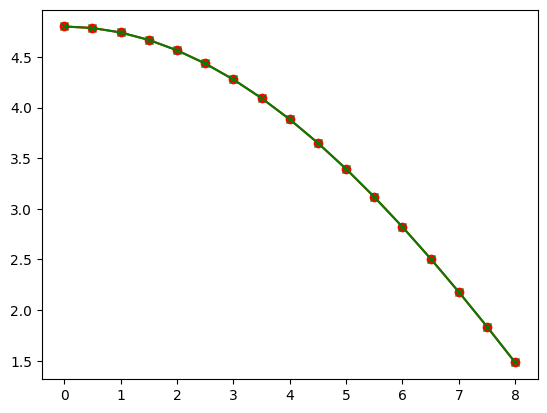

In [51]:
import matplotlib.pyplot as plt

plt.plot(x_interpol, y_exact, marker = 'o', color = 'r')
plt.plot(x_interpol, y_aprox, marker = 'x', color = 'g')
plt.show()

In [54]:
max_error = []
for i in range(len(y_aprox)):
    error = abs(y_exact[i] - y_aprox[i])
    max_error.append(error)

    print(f'el error cometido entre el valor real  de y = {y_exact[i]} y el vallor aprox = {y_aprox[i]} es {error} ')

print(f'el error maximo es {max(max_error)}')

el error cometido entre el valor real  de y = 4.8 y el vallor aprox = 4.800025094479595 es 2.509447959475608e-05 
el error cometido entre el valor real  de y = 4.785203201919014 y el vallor aprox = 4.785178491498575 es 2.4710420438722736e-05 
el error cometido entre el valor real  de y = 4.740904034856661 y el vallor aprox = 4.740876971575722 es 2.706328093893262e-05 
el error cometido entre el valor real  de y = 4.6673756179088475 y el vallor aprox = 4.667360698125794 es 1.4919783053457536e-05 
el error cometido entre el valor real  de y = 4.565071278216736 y el vallor aprox = 4.565066863118539 es 4.4150981972634895e-06 
el error cometido entre el valor real  de y = 4.4346217560541765 y el vallor aprox = 4.434621059021417 es 6.970327595112735e-07 
el error cometido entre el valor real  de y = 4.276831316104166 y el vallor aprox = 4.276828650742312 es 2.665361853892989e-06 
el error cometido entre el valor real  de y = 4.092672788899643 y el vallor aprox = 4.092666147572255 es 6.641327

### Ejercicio 6

Se conoce como *interpolación inversa* cuando la variable dependiente pasa a jugar el rol de la variable independiente (y viceversa) en el contexto de un problema de interpolación. Para ilustrar este concepto, encuentra las raíces de la siguiente función $y(x)$ dada por los siguientes datos:

<center>

| $x$  | $y$ |
|------|-----|
| 0 | 1.8421 |
| 0.5 | 2.4694 |
| 1 | 2.4921  |
| 1.5 | 1.9047 |
| 2 | 0.8509 |
| 2.5 | -0.4112 |
| 3 | -1.5727 |

</center>

Utiliza interpolación de Lagrange sobre (a) tres, y (b) cuatro puntos. Utiliza solo el rango de puntos apropiado. Resuelve el problema tanto operando *a mano* como con ordenador. Sugerencia: en los cálculos *a mano* se pueden reutilizar las cuentas hechas en el apartado (a) para resolver el (b).

In [44]:
x_3 = [2, 2.5, 3]
x_4 = [1.5, 2, 2.5, 3]
y_3 = [0.8509,  -0.4112, -1.5727]
y_4 = [1.9047, 0.8509,  -0.4112, -1.5727]
a_3 = 2
a_4 = 1.5
b_3 = 3
b_4 = 3

In [4]:
def lagrange_base(x_data: list | tuple,
                  i: int,
                  x_val: float) -> float:
    
    lag = 1.0
    for j in range(len(x_data)):
        if j != i :
            lag *= (x_val - x_data[j]) / (x_data[i] - x_data[j])

    return lag


def eval_lagrange(x_data: list | tuple,
                  y_data: list | tuple,
                  x_val: float) -> float:
    
    p = 0.0

    for i in range(len(x_data)):
        p += y_data[i] * lagrange_base(x_data, i, x_val)

    return p

In [ ]:
def find_root(x_data, y_data, a, b, tol=1e-6):
    while (b - a) / 2 > tol:
        midpoint = (a + b) / 2
        f_mid = eval_lagrange(x_data, y_data, midpoint)
        
        if abs(f_mid) < tol:
            return midpoint
        elif eval_lagrange(x_data, y_data, a) * f_mid < 0:
            b = midpoint
        else:
            a = midpoint
    return (a + b) / 2

In [51]:
root_3 = find_root(x_3, y_3, a_3, b_3 )
root_4 = find_root(x_4, y_4, a_4, b_4 )
print(root_3)
print(root_4)
print(eval_lagrange(x_3, y_3, root_3))
print(eval_lagrange(x_4, y_4, root_3))
print(eval_lagrange(x_4, y_4, root_4))

2.3326597213745117
2.3386380672454834
5.636944513942588e-08
0.015300523507012984
7.051992600981549e-09


### Ejercicio 7

La función del ejercicio anterior tiene un máximo en torno a $x = 0.77$. Encuentra dicho máximo numéricamente. Para ello, sigue el siguiente proceso:
 - Programa una función ```eval_y_piecewise_interp(y_data: list, x_data: list, x: float) -> float``` que devuelva el valor de la función en un punto ```x``` del dominio usando splines cúbicos.
 - Define una malla fina (paso $h=0.01$) llamada ```x_grid```, (es decir, ```x_grid = [0, 0.01, 0.02, ..., 3]```).
 - Calcula la derivada ```dy``` de la función en los puntos de ```x_grid```, utilizando diferencias finitas centradas de segundo orden (omite los valores en los nodos extremos)
 - Calcula dónde ```dy``` alcanza valores mínimos en valor absoluto (derivada nula). Uno de esos puntos debería estar próximo a $x = 0.77$.

### Ejercicio 8

Una función $f(x)$ aproximada por un polinomio interpolante de grado $n$ puede escribirse incluyendo su término del error como:

$$
f(x)=p_n(x)+e_n(x)=p_n(x)+\frac{f^{(n+1}(\xi)}{(n+1) !} \prod_{i=0}^n\left(x-x_i\right)
$$

donde el último sumando es el error de esta forma de interpolación, siendo $\xi$ un punto cualquiera del dominio.

Ahora, sea $f(x) = -x^2 \cdot \sqrt{1+x^2}$ y considérense los nodos $x_0 = -1$, $x_1 = 3$.

 - Escribir el polinomio interpolante (lineal) en la forma de Lagrange.
 - Programa una función que permita evaluar el polinomio anterior en un punto cualquiera en $\left[ -1, 3 \right]$
 - Aproximar $f(1)$ mediante el polinomio de Lagrange y hallar analíticamente una cota superior del error usando la fórmula anterior. Compara el resultado con el error absoluto medido.
 - Encuentra dónde se producirá el error máximo (y su valor) en el intervalo $\left[ -1, 3 \right]$.

In [52]:
from math import sqrt
def func_ej_8(x:float) -> float:
    resul = -(x ** 2) * (sqrt(1 + x ** 2))
    return resul

In [55]:
import numpy as np
x = np.linspace(-1, 3, 20)

sol = [func_ej_8(xi) for xi in x]

print(x)
print(sol)

[-1.         -0.78947368 -0.57894737 -0.36842105 -0.15789474  0.05263158
  0.26315789  0.47368421  0.68421053  0.89473684  1.10526316  1.31578947
  1.52631579  1.73684211  1.94736842  2.15789474  2.36842105  2.57894737
  2.78947368  3.        ]
[np.float64(-1.4142135623730951), np.float64(-0.794091455986236), np.float64(-0.3873005257926984), np.float64(-0.14465292022663845), np.float64(-0.0252396058543581), np.float64(-0.002773917129383351), np.float64(-0.07160986552117105), np.float64(-0.24827634923048827), np.float64(-0.5672360662529247), np.float64(-1.074221198008685), np.float64(-1.8208114290716648), np.float64(-2.8612622955437352), np.float64(-4.250963996922444), np.float64(-6.0457624378814625), np.float64(-8.301674417753008), np.float64(-11.074771628549527), np.float64(-14.42113506469463), np.float64(-18.396838435733283), np.float64(-23.05794332880491), np.float64(-28.460498941515414)]


### Ejercicio 9

Calcular el polinomio interpolante de grado 3 $p_3(x)$ de la función $f(x) = \text{sen}\left( \pi x\right)$ en $[0, 1]$ usando nodos equiespaciados. Sea
$I = \int_{0}^{1} \text{sen}\left( \pi x\right) \mathrm{d}x$, calcular $\hat{I} = \int_{0}^{1} p_3(x) \mathrm{d}x$ y determinar el error relativo de $\hat{I}$ como aproximación a $I$.

### Ejercicio 10

Sea $f(x) = e^{x}$ y $p_n(x)$ el polinomio interpolante usando $(n + 1)$ nodos equiespaciados, $x_0, \dots ,x_n$, en $\left[ 0, \frac{1}{2} \right]$
Estimar el valor de $n$ necesario para que $\left| f(x) - p(x) \right| < 10^{-6}$ para $x \in \left[0, \frac{1}{2} \right]$. Resuelve el ejercicio mediante experimentación numérica.

### Ejercicio 11

Comprobar que los polinomios $p(x) = 5x^3 - 27x^2 + 45^x - 21$ y $q(x) = x^4 - 5x^3 + 8x^2 - 5x + 3$ interpolan ambos los datos $(1, 2), (2, 1), (3, 6), (4, 47)$ y explicar por qué esto es compatible con la unicidad del polinomio interpolante.


### Ejercicio 12

Analiza si $s(x)$ es un spline cúbico con nodos -1, 0, 1 y 2:

$$
s(x)= \begin{cases}s_1(x)=1+2(x+1)+(x+1)^3 & x \in[-1,0] \\ s_2(x)=3+5 x+3 x^2 & x \in[0,1] \\ s_3(x)=11+(x-1)+3(x-1)^2+(x-1)^3 & x \in[1,2]\end{cases}
$$

### Ejercicio 13

Calcula el spline cuadrático que interpola el siguiente conjunto de puntos $(x,y)$: $(3.0, 2.5)$, $(4.5, 1.0)$, $(7.0, 2.5)$, $(9.0, 0.5)$. Utilízalo para estimar el valor en $x=5$.

### Ejercicio 14

Considera la función $f: [-1, 1] \to \mathbb{R}$ dada por:

$$
f(x) = \left| x \right|
$$

y los puntos de interpolación (malla):
$$
x_k = -1 + \frac{2k}{n} 
$$
para $k=0,1,\dots, n$

Representa en una gráfica la función original junto con los polinomios interpolantes para $n=5, 10, 15, 20$. Utiliza también splines cúbicos naturales. Comenta los resultados.

### Ejercicio 15

Con las mismas condiciones del ejercicio anterior, utiliza una base de funciones trigonométricas para aproximar la función $f(x)$. Es decir, escribe $f(x)$ como $\sum_{k=0}^{n-1} a_k \cdot \text{sen}^k x$. Plantea un sistema de ecuaciones para resolver este problema de interpolación y resuélvelo numéricamente con ayuda del módulo ```numpy.linalg```, obteniendo la función interpolante para $n=5,10,15,20$. Analiza las gráficas de dichas funciones y compáralas con las del ejercicio anterior.

### Ejercicio 16

Dada la función $f(x) = 2 + \text{sen}^2(x)$, obtener el spline cúbico que aproxima la función en $\left[ 0, 2\pi \right]$. Para ello, crea el *dataset* de valores de $x$ e $y$ a partir de una malla ```x``` equiespaciada $x_i = 0, \frac{2\pi}{4}, 2 \cdot \frac{2\pi}{4}, 3 \cdot \frac{2\pi}{4}, 2\pi$ que marcará los extremos de los subintervalos y por tanto dónde se evaluará la función para obtener los correspondientes valores $y_i$.

Después, crea una malla fina ```x_dense``` con nodos equiespaciados de la forma $\hat{x}_i = 0, \frac{2\pi}{100}, 2 \cdot \frac{2\pi}{100}, 3 \cdot \frac{2\pi}{100}, \dots, 2\pi$. Evalúa el error relativo de la aproximación por splines cúbicos anterior frente al valor original de la función. Encuentra el punto $x$ donde el error es máximo.

### Ejercicio 17

Plantea y resuelve con ayuda del ordenador el sistema de ecuaciones que permite obtener el spline cúbico natural a partir de los datos $x=[0,1,2]$, $y=[1,3,2]$ (dos intervalos). Comprueba que al evaluarlo en $x=1.5$ se obtiene un valor de $2.7813$.

### Ejercicio 18

Escribe una función ```lin_interp(x, y, x_new)```, donde ```x``` e ```y``` son listas que contienen puntos de datos experimentales, y ```x_new``` es otra lista. Asume que ```x``` y ```x_new``` están en orden ascendente y no tienen elementos repetidos. Dicha función debe devolver una nueva lista ```y_interp``` del mismo tamaño que ```x_new```, donde ```y_interp[i]``` es la interpolación lineal en ```x_new[i]```. No debes usar librerías externas para este ejercicio.

### Ejercicio 19

Escribe una función ```nearest_neighbor(x, y, x_new)```, donde ```x``` e ```y``` son listas que contienen puntos de datos experimentales, y ```x_new``` es otra lista. Asume que ```x``` y ```x_new``` están en orden ascendente y no tienen elementos repetidos. Dicha función debe devolver una nueva lista ```y_interp``` del mismo tamaño que ```x_new```, donde ```y_interp[i]``` es la interpolación por vecino cercano. Es decir, ```y_interp[i]``` debe ser el ```y[j]``` cuyo ```x[j]``` es el punto más cercano a ```x_new[i]```. No debes usar librerías externas para este ejercicio.

### Ejercicio 20

Piensa en una situación en la que el uso de la interpolación por *vecino cercano* (ejemplo anterior) sea mejor a la interpolación por spline cúbico. Pon ejemplos.

### Ejercicio 21

Escribe una función ```cubic_spline_slope(x, y, x_new, slope)```, donde ```x``` e ```y``` son listas que contienen puntos de datos experimentales, ```x_new``` es otra lista y ```slope``` es un número real. Asume que ```x``` y ```x_new``` están en orden ascendente y no tienen elementos repetidos. Dicha función debe devolver una nueva lista ```y_interp``` del mismo tamaño que ```x_new```, donde ```y_interp[i]``` es la interpolación por spline cúbico en ```x_new[i]```. Sin embargo, en lugar de las restricciones correspondientes al spline natural (recuerda que allí imponíamos que $S^{''}_1 \left( x_1 \right) = 0$ y $S^{''}_{n-1} \left( x_n \right) = 0$) impón que la primera derivada del spline en los puntos extremos debe ser igual a ```slope```.

### Ejercicio 22

Escriba una función ```quintic_spline(x, y, x_new)```, donde ```x``` e ```y``` son listas que contienen puntos de datos experimentales, y ```x_new``` es otra lista. Asume que ```x``` y ```x_new``` están en orden ascendente y no tienen elementos repetidos. Dicha función debe devolver una nueva lista ```y_interp``` del mismo tamaño que ```x_new```, donde ```y_interp[i]``` es la interpolación por spline de orden 5 en ```x_new[i]```. Tendrás que utilizar restricciones adicionales en los extremos para obtener suficientes ecuaciones. Fija dichas restricciones libremente.


### Ejercicio 24

Mediante el cálculo de la tabla de diferencias divididas correspondiente, calcula el polinomio de Hermite para el siguiente dataset

<center>

| $i$  | $x_i$ | $y_i$ | $y'_i$ |
|------|-------|-------|--------|
| 0    | 8.3   | 17.56492 | 3.116256|
| 1    | 8.6   | 18.50515 | 3.151762|

</center>

Los datos anteriores se han obtenido usando la función $f(x) = x \ln x$. Utiliza el polinomio de Hermite para aproximar $f(8.4)$ y calcula el error absoluto de esta aproximación.

### Ejercicio 25

Mediante el cálculo de la tabla de diferencias divididas correspondiente, calcula el polinomio de Hermite para el siguiente dataset

<center>

| $i$  | $x_i$ | $y_i$ | $y'_i$ |
|------|-------|-------|--------|
| 0    | -0.5   | -0.0247500 | 0.7510000|
| 1    | -0.25   | 0.3349375 | 2.1890000|
| 2    | 0   | 1.1010000 | 4.0020000|
</center>

Los datos anteriores se han obtenido usando la función $f(x) = x^3 + 4.001 x^2 + 4.002 x + 1.101$. Utiliza el polinomio de Hermite para aproximar $f(-1/3)$ y calcula el error absoluto de esta aproximación. 

### Ejercicio 26

¿Es posible determinar un polinomio único de grado $\le 3$ que interpole los siguientes datos?
 - **(a)** $p(0)=f(0) ;\quad p(1)=f(1) ; \quad p^{\prime}(-1)=f^{\prime}(-1) ; \quad p^{\prime \prime}(0)=f^{\prime \prime}(0)$

 - **(b)** $p(0)=f(0) ;\quad p^{\prime}(-1)=f^{\prime}(-1) ; \quad p^{\prime}(0)=f^{\prime}(0) ; \quad p^{\prime \prime}(-1 / 2)=f^{\prime \prime}(-1 / 2)$

### Ejercicio 27

El siguiente bloque de código define y dibuja el *cuarteto de Ascombe*, un *dataset* creado explicitamente para ilustrar que el mero cálculo de la recta de regresión no es suficiente para explicar la naturaleza de los datos. En el cuarteto, aparecen 4 conjuntos de puntos, todos ellos ajustados con la misma recta de regresión, pero todos presentando una naturaleza muy disitinta:

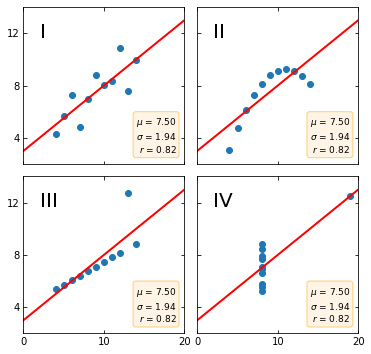

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.show()

Explica, a tu juicio, en cuáles de los cuatro conjuntos de puntos el modelo lineal es acertado. Cuando no lo sea, explica por qué.

### Ejercicio 28

En el cuarteto de Ascombe (ver ejercicio anterior), el tercer conjunto de puntos presenta una naturaleza muy particular: todos los puntos ajustan muy bien a una determinada recta menos uno. Cuando pocos puntos están muy alejados de la tendencia general, se les llama *outliers*. En la práctica, qué hacer con dichos outliers queda a criterio del científico, pero muchas veces se opta por eliminarlos. 

Crea una función ```regression_outliers_removal(x:list, y:list)``` que calcule la recta de regresión pero que para su cálculo elimine un máximo de UN outlier. Para ello, procede de la siguiente forma. Comienza calculando el coeficiente de correlación para el *dataset* ```x``` / ```y``` original. Después, calcula también el coeficiente de correlación para todos los datasets resultantes de eliminar un único punto de ```x``` / ```y```, comprobando en esos casos si es al menos un 10% mejor que el original y mejor que el resto de los calculados para estos *datasets* reducidos. El *dataset* seleccionado finalmente es el que se usará para el ajuste lineal. La función debe devolver los dos coeficientes de la recta de ajuste en formato tupla.

Comprueba que tu implementación funciona correctamente con el conjunto 3 del *dataset* de Anscombe.


### Ejercicio 29

Calcula *a mano* la recta de regresión para los siguientes datos
<center>

| $x$ | $y$ |
|-----|-----|
|  -2  |  -1  |
|  1  |  2 |
|  4  |  4
|  5 |  4 |

</center>

Comprueba el resultado calculando computacionalmente los coeficientes de la recta.

### Ejercicio 30

El siguiente *dataset* depende de un parámetro ```k```, que inicialmente se fija en $0.25$:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

k = 0.25
x = np.linspace(0, 1, 101)
y = 1 + x + k * x * np.random.random(len(x))

plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')

Estudia la calidad del ajuste lineal (medida a través del coeficiente de determinación $R^2$) en función del parámetro ```k``` en el intervalo $\left[0.25, 25 \right]$

### Ejercicio 31

Ajusta mediante polinomios de grado desde 1 hasta 6 el siguiente *dataset*:

In [2]:
import numpy as np
x_d = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y_d = np.array([0, 0.8, 0.9, 0.1, -0.6, -0.8, -1, -0.9, -0.4])

np.polyfit(x_data, y_data, deg = 1) 

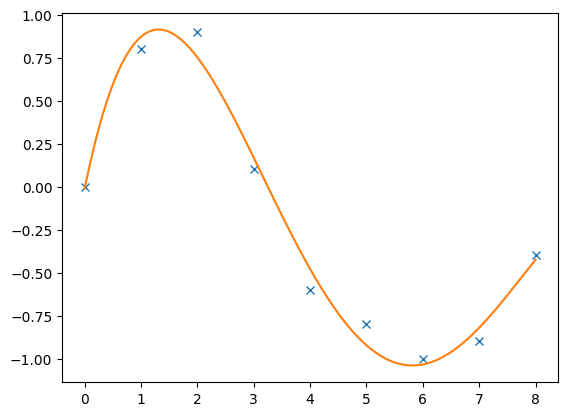

In [8]:
fit_pol_func = np.polyfit(x_d, y_d, deg = 4) 

x_rep = np.linspace(0, 8 , 100)

y_est = np.polyval(fit_pol_func, x_rep)

import matplotlib.pyplot as plt



plt.plot(x_d, y_d, 'x')
plt.plot(x_rep, y_est, '-')

plt.show()

solucion usar una malla auxiliar con el vector x oiginal que es la baase que te dan pero me creo una malla nueva para la representacion que sea mucho mas fina

In [10]:
import matplotlib.pyplot as plt

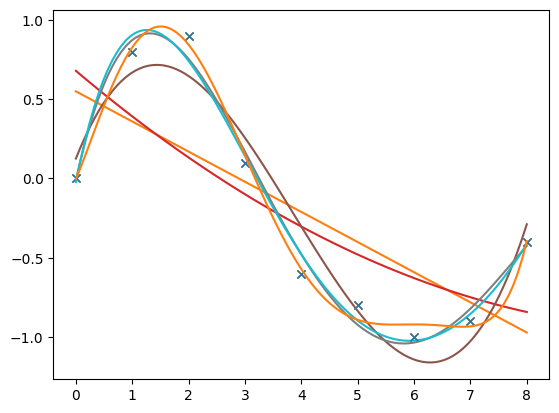

In [ ]:
for i in range(1, 7):    
    fit_pol_func = np.polyfit(x_d, y_d, deg = i) 

    x_rep = np.linspace(0, 8 , 100)

    y_est = np.polyval(fit_pol_func, x_rep) # el polinomio estimado 

    plt.plot(x_d, y_d, 'x')
    plt.plot(x_rep, y_est, '-')

plt.show()

Puedes utilizar librerías preprogramadas para los cálculos. Para cada polinomio, calcula sus coeficientes y el coeficiente de determinación $R^2$ para evaluar la bondad del ajuste.

### Ejercicio 32

Observa el siguiente *dataset* donde los datos presentan una naturaleza exponencial:

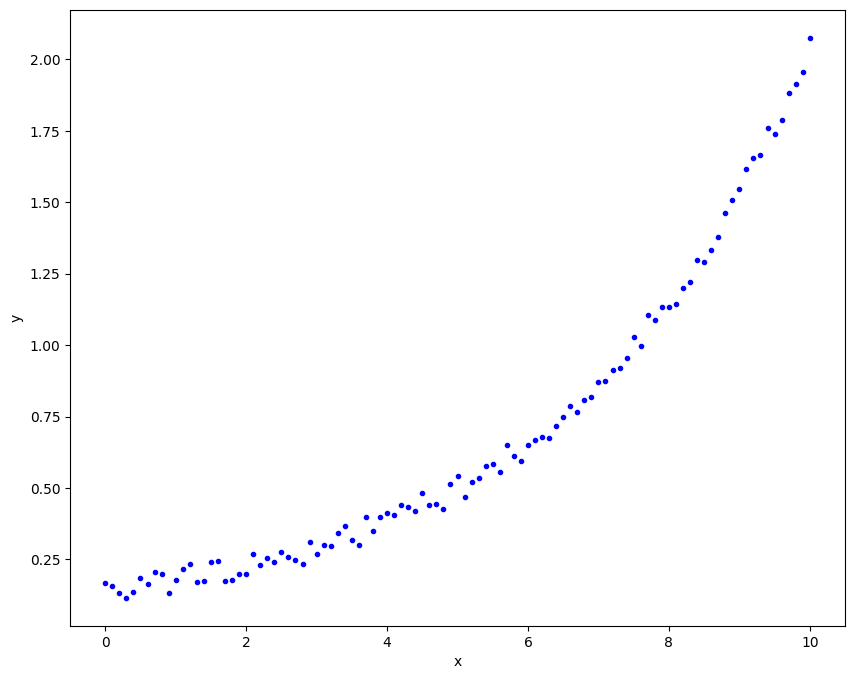

In [29]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 101)
y = 0.1*np.exp(0.3*x) + 0.1*np.random.random(len(x))

plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Ajusta los datos a una función de la forma $\hat{y} = \alpha e^{\beta x}$. Parte de las fórmulas/funciones de regresión lineal y piensa en qué modificaciones debes hacer.

### Ejercicio 33

Para construir un pseudocódigo que calcule la tabla de diferencias divididas conviene escribirla en la siguiente forma:

$$
\begin{array}{ccccccc}
& & j= 0 & j=1 & j=2 & & j=n \\
i=0 & x_0 & f\left[x_0\right] & & & & \\
i=1 & x_1 & f\left[x_1\right] & f\left[x_0, x_1\right] & & & \\
i=2 & x_1 & f\left[x_2\right] & f\left[x_1, x_2\right] & f\left[x_0, x_1, x_2\right] & & \\
\vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \\
i=n & x_n & f\left[x_n\right] & f\left[x_{n-1}, x_n\right] & f\left[x_{n-2}, x_{n-1}, x_n\right] & & f\left[x_0, \ldots, x_n\right]
\end{array}
$$


Los valores de las diferencias pueden almacenarse en una matriz $a[0:n, 0:n]$ mediante la asignación:

$$
a_{i j}=f\left[x_{i-j}, x_{i-j+1}, \ldots, x_i\right]=\frac{a_{i, j-1}-a_{i-1, j-1}}{x_i-x_{i-j}}
$$

Los coeficientes del polinomio interpolante siguen siendo los primeros elementos de cada columna, y están almacenados en la diagonal principal. 

Escribir una función ```tabla_dd(x:list, y:list)``` que calcule la tabla de diferencias divididas y devuelva los coeficientes del polinomio interpolante.



### Ejercicio 34

Completar la siguiente tabla de diferencias divididas:

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=465&a=true&file=completar_tabla_dd.png&t=KXn0DeZtkR8CK5V&scalingup=0" width="440"/>
</div>
</center>

### Ejercicio 35

Utiliza las fórmulas compuestas del Trapecio y de Simpson con el número indicado de subintervalos para aproximar las siguientes integrales. Realiza los cálculos *a mano* y comprueba los resultados utilizando alguna librería numérica ya programada:
 - $\int_0^2 \frac{2}{x^2+4} d x, \quad n=6$
 - $\int_3^5 \frac{1}{\sqrt{x^2-4}} d x, \quad n=8$
 - $\int_{-2}^2 x^3 e^x d x, \quad n=4$

### Ejercicio 36

Determinar qué paso $h$ debe fijarse para aproximar con error menor que $10^{-6}$ la integral $\int_0^2 \frac{1}{x+4} dx$ mediante
 - **(a)** la fórmula compuesta del Trapecio.
 - **(b)** la fórmula compuesta de Simpson.

Comprueba tus resultados mediante algún test numérico

### Ejercicio 37

Prueba numéricamente que las fórmulas de integración de Gauss consiguen realizar integrales exactas para polinomios de hasta grado $2n+1$. El número de nodos es $n+1$. Prueba con $n=2, \dots,  5$, con polinomios arbitrarios integrados de $-1$ a $1$. Recuerda que, en ese caso, tanto las posiciones de los nodos como sus pesos están tabulados (ver apuntes).

### Ejercicio 38

Las integrales del tipo $\int_0^\infty f(x) dx$ pueden abordarse mediante un cambio de variable. Calcula mediante la fórmula de Simpson con $n=6$ y el cambio $x=1/t$ las siguientes integrales
- **(a)** $\int_1^{\infty} \frac{\cos x}{x^3} \mathrm{~d} x$
- **(b)** $\int_1^{\infty} \frac{1}{x^2+9} \mathrm{~d} x$ (comparar con el valor exacto)
- **(c)** $\int_0^{\infty} \frac{1}{x^4+1} \mathrm{~d} x$ (descomponer previamente en $\int_0^1 + \int_1^\infty$ y comparar con el valor exacto $\sqrt{2} \pi /4$).


### Ejercicio 39

Utilizando las fórmulas simples (un único subintervalo $[0,1]$) del Trapecio y de Simpson, aproxima:
$$
\int_0^1 \frac{\sin x}{x} dx
$$
y da una cota para el error cometido en cada caso

### Ejercicio 40

Con ayuda del ordenador, calcula la siguiente integral utilizando el método del Trapecio y de Simpson:
$$
\int_0^{1} e^{-x^2} dx
$$
con un error inferior a $10^{-4}$ (estudiar previamente, en cada caso, cuál debe ser el número de subintervalos).